[TDS Classification Basics Walkthrough](https://towardsdatascience.com/classification-basics-walk-through-with-the-iris-data-set-d46b0331bf82)

In [37]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
iris = load_iris()#view data description and information
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
data = pd.DataFrame(iris.data)
data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
target = pd.DataFrame(iris.target)
target = target.rename(columns = {0: 'target'})
target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [7]:
df = pd.concat([data, target], axis = 1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


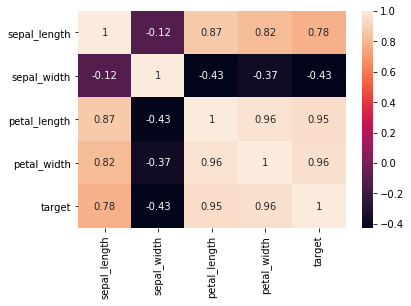

In [14]:
sns.heatmap(df.corr(), annot = True);

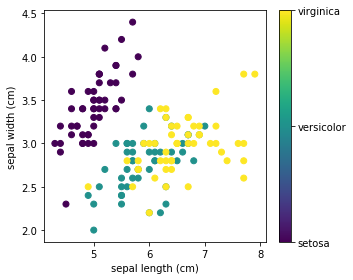

In [19]:
x_index = 0
y_index = 1

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()

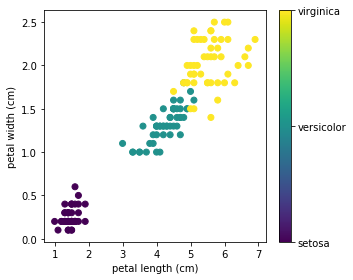

In [20]:
x_index = 2
y_index = 3

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()

In [31]:
X = df.copy()
y = X.pop('target')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

df.target.value_counts(normalize= True)

#create the model instance
model = LogisticRegression()

#fit the model on the training data
model.fit(X_train, y_train)

#the score, or accuracy of the model
model.score(X_test, y_test)
# Output = 0.9666666666666667

#the test score is already very high, but we can use the cross validated score to ensure the model's strength 
scores = cross_val_score(model, X_train, y_train, cv=10)
print(np.mean(scores))
# Output = 0.9499999999999998

0.9499999999999998


In [32]:
df_coef = pd.DataFrame(model.coef_, columns=X_train.columns)
df_coef

,sepal_length,sepal_width,petal_length,petal_width
0,-1.102746,1.001818,-1.836891,-1.667978
1,0.402982,-0.323432,-0.277761,-0.650011
2,0.699764,-0.678386,2.114653,2.317989


In [33]:
predictions = model.predict(X_test)#compare predicted values with the actual scores
compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
compare_df

,actual,predicted
0,2,2
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,2,2
7,2,2
8,2,2
9,1,1


In [36]:
pd.DataFrame(confusion_matrix(y_test, predictions, labels=[2, 1, 0]),index=[2, 1, 0], columns=[2, 1, 0])

,2,1,0
2,9,1,0
1,0,10,0
0,0,0,10


In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [39]:
probs = model.predict_proba(X_test)

#put the probabilities into a dataframe for easier viewing
Y_pp = pd.DataFrame(model.predict_proba(X_test), columns=['class_0_pp', 'class_1_pp', 'class_2_pp'])
Y_pp.head()

,class_0_pp,class_1_pp,class_2_pp
0,0.000016,0.062182,9.378022e-01
1,0.958819,0.041181,5.060799e-07
2,0.147033,0.846368,6.598360e-03
3,0.983033,0.016967,2.623772e-07
4,0.970334,0.029663,2.118099e-06
